In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os

In [4]:
import imutils

In [240]:
class ObjectDetector:
    
    # template
    # source images directory
    # source images list
    # found list
    # parameters
    
    def __init__(self, template_path, src_img_dir, src_img_list, detection_threshold = 0.0, 
                 threshold1 = 50, threshold2 = 200, 
                 start = 0.4, stop = 1.0, steps = 20):
        
        self.template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        self.w, self.h = self.template.shape[::-1]
        
        self.src_img_dir = src_img_dir
        self.src_img_list = src_img_list
        
        self.detection_threshold = detection_threshold
        
        self.threshold1 = threshold1
        self.threshold2 = threshold2
        
        self.scaling_params = [start, stop, steps]
        
    def getSourceImageDir(self):
        return self.src_img_dir
    
    def getSourceImageList(self):
        return self.src_img_list
    
    def displayTemplate(self, color_flag = 1):
        if color_flag == 1:
            plt.imshow(cv2.cvtColor(self.template, cv2.COLOR_BGR2RGB))
        elif color_flag == 0:
            plt.imshow(cv2.cvtColor(self.template, cv2.COLOR_BGR2GRAY))
        elif color_flag == -1:
            plt.imshow(self.template)
        else:
            print('Error: Invalid value input for color_flag')
            
    def getDetectionThreshold(self):
        return self.detection_threshold
    
    def getCannyThresholds(self):
        return self.threshold1, self.threshold2
    
    def getScalingParams(self):
        return self.scaling_params
    
    def setTemplate(self, template_path):
        self.template = cv2.imread(template_path)
        
    def setSourceImageDir(self, src_img_dir):
        self.src_img_dir = src_img_dir
        
    def setSourceImageList(self, src_img_list):
        self.src_img_list = src_img_list
    
    def setDetectionThreshold(self, detection_threshold):
        self.detection_threshold = detection_threshold
    
    def setCannyThresholds(self, threshold1 = 50, threshold2 = 200):
        self.threshold1 = threshold1
        self.threshold2 = threshold2
        
    def setScalingParams(self, start = 0.4, stop = 1.0, steps = 20):
        self.scaling_params = [start, stop, steps]
    
    def scaleMatch(self, edge_img, edge_temp):
        found = None
    
        for scale in np.linspace(self.scaling_params[0], self.scaling_params[1], self.scaling_params[2])[::-1]:
            resized_img = imutils.resize(edge_img, width = int(edge_img.shape[1] * scale))
            rescaling_factor = edge_img.shape[1]/ float(resized_img.shape[1])
        
            if resized_img.shape[0] < self.h or resized_img.shape[1] < self.w:
                break;
            
            result = cv2.matchTemplate(resized_img, edge_temp, cv2.TM_CCOEFF_NORMED)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
        
            if found == None or maxVal > found[0]:
                found = (maxVal, maxLoc, rescaling_factor)
            
        return found
    
    def detectObject(self):
        # Get edges in template image
        edge_template = cv2.Canny(self.template, self.threshold1, self.threshold2)

        # Find images containing object
        found_list = []
        for img_name in self.src_img_list:
            # Get edges in source image
            src_img = cv2.Canny(cv2.imread(os.path.join(self.src_img_dir, img_name), cv2.IMREAD_GRAYSCALE), 
                                self.threshold1, self.threshold2)
            found_list.append(self.scaleMatch(src_img, edge_template))
        
        # Draw rectangle over detected object in copy of source image
        output_img_list = []
        object_present = []
        for i in range(0, len(self.src_img_list)):
            
            src_img = cv2.imread(os.path.join(self.src_img_dir, self.src_img_list[i]))
    
            (maxVal, maxLoc, rescaling_factor) = found_list[i]
    
            # If object present
            if maxVal >= self.detection_threshold:
                object_present.append(1)
            
                (startX, startY) = (int(maxLoc[0] * rescaling_factor), 
                                    int(maxLoc[1] * rescaling_factor))
                (endX, endY) = (int((maxLoc[0] + self.w) * rescaling_factor), 
                                int((maxLoc[1] + self.h) * rescaling_factor))
    
                cv2.rectangle(src_img, (startX, startY), (endX, endY), (0, 0, 255), 2)
        
            else:
                object_present.append(0)
    
            output_img_list.append(src_img)
        
        return output_img_list, object_present

<body>
    <h1> Experiment 1</h1>
</body>

<h4> Threshold Studies </h4>

<h5> Threshold 1 = 0% </h5>

In [295]:
# Parameters:

template_path = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Template_Image/Template.JPG'
src_img_dir = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Source_Images/'
src_img_list = [name for name in os.listdir(src_img_dir) if os.path.isfile(os.path.join(src_img_dir, name))]
detection_threshold = 0.0
threshold1 = 50
threshold2 = 200
start = 0.8
stop = 1.5
steps = 20

myObjectDetector = ObjectDetector(template_path, src_img_dir, src_img_list, detection_threshold, 
                                  threshold1, threshold2, 
                                  start, stop, steps)

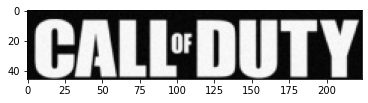

In [296]:
myObjectDetector.displayTemplate()

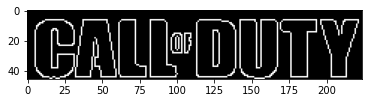

In [297]:
plt.imshow(cv2.cvtColor(cv2.Canny(cv2.imread(template_path, cv2.IMREAD_GRAYSCALE), 50, 200), cv2.COLOR_BGR2RGB))

In [278]:
output_img_list, object_present = myObjectDetector.detectObject()

In [279]:
object_present

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

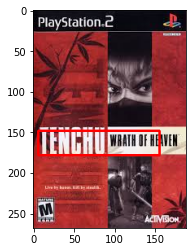

In [280]:
plt.imshow(cv2.cvtColor(output_img_list[1], cv2.COLOR_BGR2RGB))

<h5> Threshold 2 = 80% </h5>

In [281]:
detection_threshold = 0.8

myObjectDetector.setDetectionThreshold(detection_threshold)

In [282]:
output_img_list, object_present = myObjectDetector.detectObject()

In [283]:
object_present

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

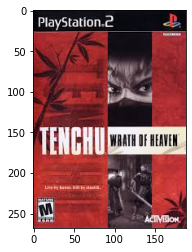

In [284]:
plt.imshow(cv2.cvtColor(output_img_list[1], cv2.COLOR_BGR2RGB))

<h5>Threshold 3 = 15% </h5>

In [290]:
detection_threshold = 0.15

myObjectDetector.setDetectionThreshold(detection_threshold)

In [291]:
output_img_list, object_present = myObjectDetector.detectObject()

In [292]:
object_present

[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]

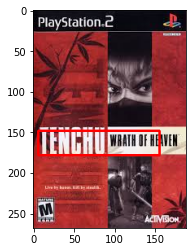

In [293]:
plt.imshow(cv2.cvtColor(output_img_list[1], cv2.COLOR_BGR2RGB))

<h1> Experiment 2 </h1>

<h4>Threshold Studies </h4>

<h5>Threshold 1 = 0%</h5>

In [251]:
# Parameters:

template_path = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Template_Image/Template.JPG'
src_img_dir = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Source_Images/'
src_img_list = [name for name in os.listdir(src_img_dir) if os.path.isfile(os.path.join(src_img_dir, name))]
detection_threshold = 0.0
threshold1 = 50
threshold2 = 200
start = 0.8
stop = 4.0
steps = 20

myObjectDetector = ObjectDetector(template_path, src_img_dir, src_img_list, detection_threshold, 
                                  threshold1, threshold2, 
                                  start, stop, steps)

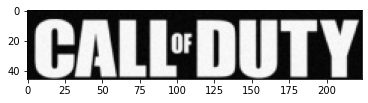

In [252]:
myObjectDetector.displayTemplate()

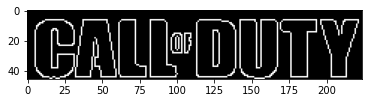

In [257]:
plt.imshow(cv2.cvtColor(cv2.Canny(cv2.imread(template_path, cv2.IMREAD_GRAYSCALE), 50, 200), cv2.COLOR_BGR2RGB))

In [253]:
output_img_list, object_present = myObjectDetector.detectObject()

In [254]:
object_present

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

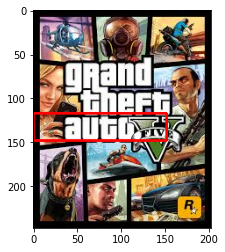

In [255]:
plt.imshow(cv2.cvtColor(output_img_list[5], cv2.COLOR_BGR2RGB))

<h5>Threshold 2 = 15% </h5>

In [258]:
detection_threshold = 0.15

myObjectDetector.setDetectionThreshold(detection_threshold)

In [259]:
output_img_list, object_present = myObjectDetector.detectObject()

In [260]:
object_present

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]

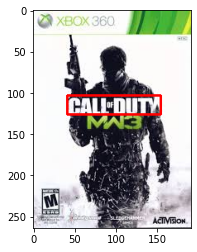

In [261]:
plt.imshow(cv2.cvtColor(output_img_list[0], cv2.COLOR_BGR2RGB))

<h5>Threshold 3 = 80% </h5>

In [262]:
detection_threshold = 0.8

myObjectDetector.setDetectionThreshold(detection_threshold)

In [263]:
output_img_list, object_present = myObjectDetector.detectObject()

In [264]:
object_present

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

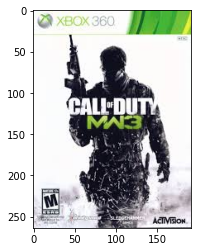

In [265]:
plt.imshow(cv2.cvtColor(output_img_list[0], cv2.COLOR_BGR2RGB))

<h1>Experiment 3</h1>

In [313]:
# Parameters:

template_path = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Template_Image/Template.JPG'
src_img_dir = '/home/dell/Documents/OpenCV_Practice_Projects/CV_Curriculum/Template_Matching/dataset2/Source_Images/'
src_img_list = [name for name in os.listdir(src_img_dir) if os.path.isfile(os.path.join(src_img_dir, name))]
detection_threshold = 0.0
threshold1 = 50
threshold2 = 100
start = 0.8
stop = 1.5
steps = 20

myObjectDetector = ObjectDetector(template_path, src_img_dir, src_img_list, detection_threshold, 
                                  threshold1, threshold2, 
                                  start, stop, steps)

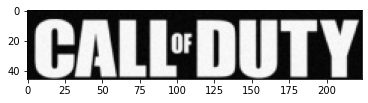

In [314]:
myObjectDetector.displayTemplate()

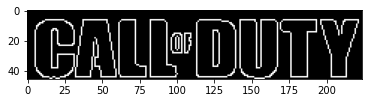

In [315]:
plt.imshow(cv2.cvtColor(cv2.Canny(cv2.imread(template_path, cv2.IMREAD_GRAYSCALE), 50, 200), cv2.COLOR_BGR2RGB))

In [316]:
output_img_list, object_present = myObjectDetector.detectObject()

In [317]:
object_present

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

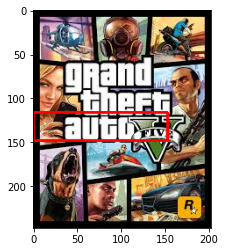

In [318]:
plt.imshow(cv2.cvtColor(output_img_list[5], cv2.COLOR_BGR2RGB))

<h5>Threshold 2 = 15% </h5>

In [319]:
detection_threshold = 0.15

myObjectDetector.setDetectionThreshold(detection_threshold)

In [320]:
output_img_list, object_present = myObjectDetector.detectObject()

In [321]:
object_present

[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]

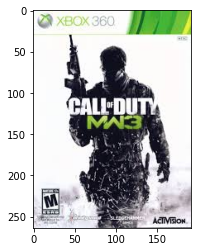

In [322]:
plt.imshow(cv2.cvtColor(output_img_list[0], cv2.COLOR_BGR2RGB))

<h5>Threshold 3 = 80% </h5>

In [323]:
detection_threshold = 0.8

myObjectDetector.setDetectionThreshold(detection_threshold)

In [324]:
output_img_list, object_present = myObjectDetector.detectObject()

In [325]:
object_present

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

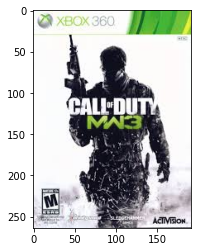

In [326]:
plt.imshow(cv2.cvtColor(output_img_list[0], cv2.COLOR_BGR2RGB))